# Aprendizado de máquina não supervisionado

In [1]:
# Importando bibliotecas
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Importando dados
bruto = pd.read_csv('Neutral_Graphene_Oxide_Nanoflake_Dataset.zip')

# Excluir as colunas que tem NaN
bruto_completo = bruto.dropna(axis = 1, how ='any')

# Excluir colunas de targets
del bruto_completo['file_name']
del bruto_completo['charge_state']
del bruto_completo['ionization_potential']
del bruto_completo['electron_affinity']
del bruto_completo['Shape']

dados = bruto_completo.copy()

del dados['total_energy']
del dados['Fermi_energy']

In [3]:
# indexando atributos
FEATURES = list(dados.keys())
print(FEATURES)

X = dados.reindex(FEATURES, axis=1)

['C', 'H', 'O', 'atom_number_total', 'C_concentration', 'H_concentration', 'O_concentration', 'avg_diameter', 'max_diameter', 'min_diameter', 'std_diameter', 'skew_diameter', 'kurt_diameter', 'anisotropy', 'area', 'AC_edge', 'ZZ_edge', 'total_edge', 'defects_count', 'defects_concentration', 'max_oop', 'mae_oop', 'std_oop', 'rmse_oop', 'residual_oop', 'ether_count', 'hydroxyl_count', 'carboxyl_count', 'edge_hydrogen_count', 'all_agent_group_count', 'ether_concentration', 'hydroxyl_concentration', 'carboxyl_concentration', 'def_local_ether_count', 'def_local_hydroxyl_count', 'def_local_carboxyl_count', 'def_local_other_count', 'max_bond_angle', 'max_bond_length', 'volume_per_atom', 'density_of_dangling_bonds', 'mass_density', 'particle_density', 'C-C:total_number', 'C-C:mean_value', 'C-C:error', 'C-C_sp2-sp3:total_number', 'C-C_sp2-sp3:mean_value', 'C-C_sp2-sp3:error', 'C-C_sp3-sp3:total_number', 'C-C_sp3-sp3:mean_value', 'C-C_sp3-sp3:error', 'C-C-C:total_number', 'C-C-C:mean_value', 'C-

In [4]:
# normalização
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

# Principal Component Analysis

In [5]:
# Fazendo a transformação de PCA
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

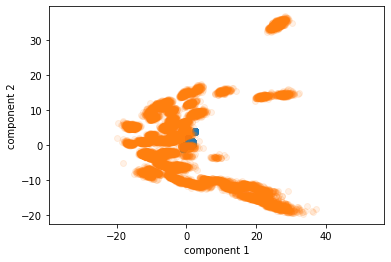

In [6]:
# plotando dois primeiros componentes
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

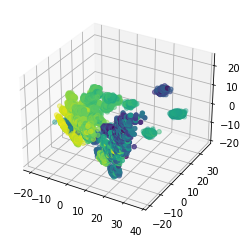

In [7]:
# plotando tres primeiros componentes
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=bruto_completo["Fermi_energy"].values)

In [8]:
# calculando a matriz de loadings
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC640,PC641,PC642,PC643,PC644,PC645,PC646,PC647,PC648,PC649
C,-0.006772,0.085127,0.015486,0.024565,-0.002083,-0.001013,-0.002243,-0.018484,0.056690,0.026901,...,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
H,0.025345,0.083335,-0.027824,0.011479,-0.001176,0.003700,-0.000625,0.012678,-0.026709,-0.018539,...,1.163359e-04,-1.142400e-04,3.225575e-05,2.841543e-04,-8.123420e-04,-2.424619e-04,-1.159900e-04,2.350565e-04,7.138174e-04,1.138932e-03
O,0.041393,0.077523,-0.009302,0.000682,0.000689,0.002081,0.000778,-0.000510,-0.012163,-0.008690,...,-3.656801e-14,1.081198e-14,1.697735e-14,2.165213e-15,-4.339444e-14,1.660103e-15,-7.303398e-15,-3.334887e-15,4.894017e-14,4.855522e-14
atom_number_total,0.010851,0.088520,0.001987,0.017776,-0.001363,0.000597,-0.001335,-0.009221,0.027286,0.011090,...,5.268980e-14,1.463480e-14,2.924873e-14,4.757045e-15,7.411323e-14,7.443875e-15,1.977143e-15,1.689325e-14,-1.000108e-13,-1.288554e-14
C_concentration,-0.072351,0.000122,0.040148,0.009302,-0.001210,0.001067,-0.000094,-0.018326,0.077544,0.042938,...,-5.723606e-12,8.026937e-12,-8.165213e-12,1.729021e-11,-4.268121e-12,-1.297293e-12,3.040274e-12,3.058735e-12,1.122926e-11,-8.988015e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prox_norm_Iyy_bar_hydro_area,0.053969,-0.062664,-0.011138,0.019819,-0.002054,-0.000290,-0.001348,-0.018626,0.025604,0.006678,...,-3.007462e-05,5.761245e-04,-1.172226e-03,1.457276e-03,7.345335e-05,3.212093e-04,-2.478578e-04,-1.591266e-04,-2.608955e-04,4.142039e-03
prox_norm_Izz_bar_hydro_area,0.054088,-0.062971,-0.010966,0.020033,-0.002083,-0.000211,-0.001384,-0.018490,0.024498,0.006219,...,-2.045119e-04,1.506353e-03,1.015098e-04,2.117931e-04,8.134634e-04,8.101829e-05,1.913805e-04,-1.764200e-04,-3.451952e-04,-2.565179e-04
prox_norm_Ixy_hydro_area,0.001719,0.001588,-0.001027,-0.006205,-0.035926,-0.220084,-0.103021,0.017022,0.001988,-0.000859,...,-7.577706e-06,1.213876e-04,2.440626e-04,-2.120037e-04,-1.488593e-04,1.575370e-06,-8.916417e-05,6.515297e-06,-1.201036e-05,6.326968e-02
prox_norm_Iyz_hydro_area,-0.000168,0.002363,-0.002569,-0.010146,-0.207952,0.063381,-0.068050,-0.026250,-0.008466,0.000332,...,4.876545e-04,-5.614325e-04,-2.897709e-04,6.680361e-05,2.060566e-04,2.893855e-05,7.343082e-05,-1.659225e-05,-1.185671e-05,-6.306086e-03


array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

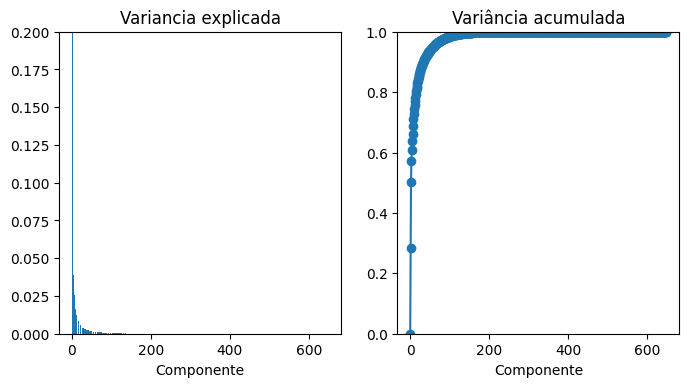

In [9]:
# plotando a variância para ver quantas componentes são importantes
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 0.2)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


## Vemos que com cerca de 100 componentes, quase toda a complexidade do sistema já é compreendida

In [10]:
# adicionando os targets ao dataset de PCA
E = []
i = 0
while i < len(bruto_completo['C']):
    E.append(bruto_completo['total_energy'][i]/bruto_completo['atom_number_total'][i])
    i = i+1
print(len(bruto_completo['total_energy']), len(E))
dados_pca = X_pca.assign(energy_per_atom = E)
dados_pca = dados_pca.assign(Fermi_energy = bruto_completo['Fermi_energy'])
print(dados_pca)

20396 20396
             PC1        PC2        PC3       PC4       PC5       PC6  \
0      -7.681818  -5.067397  -8.184635  2.151961  0.142412  0.470457   
1      -8.056346  -5.248189  -8.795334  1.790727 -0.767602 -3.349599   
2      -5.915746  -5.098263  -8.975259  2.453035 -0.195090  4.442486   
3      -7.826873  -5.402287  -8.118646  2.954057  0.174344  1.546050   
4      -8.338267  -5.236509  -7.384683  1.910704 -0.674772  0.440800   
...          ...        ...        ...       ...       ...       ...   
20391  26.453409  14.398719  14.727526  4.068422 -2.295120 -8.026951   
20392  26.216464  14.682567  14.397345  2.769930  6.865332  0.878376   
20393  27.498255  15.008001  14.044858  5.575967  5.607925  3.679714   
20394  27.306297  14.496253  15.413836  5.033438 -3.425159  6.179218   
20395  26.970648  14.590271  14.176886  5.366007 -1.479603 -2.778557   

             PC7        PC8       PC9      PC10  ...         PC642  \
0       0.274933  -0.249166 -1.726827 -0.735870  ... 

# Floresta Aleatória com PCA

## Separação teste/treino para Energia de Fermi:

In [11]:
# Define o tamanho dos dados de teste e de treino e cria os dataframes

from sklearn.model_selection import train_test_split

df_fermi = dados_pca.copy()

#escolhe o tamanho do nosso teste
TAMANHO_TESTE = 0.1
# fixa quais dados que vão ser selecionados para teste e treino
SEMENTE_ALEATORIA = 24569
DATASET_NAME = "df_fermi"
# faz uma lista de features que queremos usar, no caso são todas
FEATURES = list(df_fermi.keys()[0:10])

#o que queremos achar
TARGET = ["Fermi_energy"]


indices = df_fermi.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_fe = df_fermi.loc[indices_treino]
df_teste_fe = df_fermi.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_fe = df_treino_fe.reindex(FEATURES, axis=1).values
y_treino_fe = df_treino_fe.reindex(TARGET, axis=1).values
x_teste_fe = df_teste_fe.reindex(FEATURES, axis=1).values
y_teste_fe = df_teste_fe.reindex(TARGET, axis=1).values

In [24]:
print(len(x_teste_fe))

2040


### Baseline

In [20]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error

In [26]:
# Criar um modelo regressor "dummy"
from sklearn.dummy import DummyRegressor

# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(x_treino_fe, y_treino_fe)

# realiza uma previsão usando o modelo treinado
previsao_fe = modelo_baseline.predict(x_teste_fe)

print(previsao_fe)
# testando a qualidade do nosso modelo:
RMSE(previsao_fe, y_teste_fe)

[-4.95704166 -4.95704166 -4.95704166 ... -4.95704166 -4.95704166
 -4.95704166]


0.0909103434593051

## Separação teste/treino para Energia por Átomo:

In [27]:
# Criar os dados de teste e de treino
df_energia = dados_pca.copy()
#escolhe o tamanho do nosso teste
tamanho_teste = 0.1
# fixa quais dados que vão ser selecionados para teste e treino
semente_aleatoria = 24569
# faz uma lista de features que queremos usar, no caso são todas
features = list(df_energia.keys()[0:10])

#o que queremos achar
target = ["energy_per_atom"]


indices = df_energia.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state= semente_aleatoria
)

df_treino_en = df_energia.loc[indices_treino]
df_teste_en = df_energia.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_en = df_treino_en.reindex(features, axis=1).values
y_treino_en = df_treino_en.reindex(target, axis=1).values
x_teste_en = df_teste_en.reindex(features, axis=1).values
y_teste_en = df_teste_en.reindex(target, axis=1).values

In [28]:

modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(x_treino_en, y_treino_en)

# realiza uma previsão usando o modelo treinado
previsao_en = modelo_baseline.predict(x_teste_en)

print(previsao_en)
# testando a qualidade do nosso modelo:
RMSE(y_teste_en, previsao_en)

[-47.41313446 -47.41313446 -47.41313446 ... -47.41313446 -47.41313446
 -47.41313446]


5.539576756227252

In [29]:
from itertools import product
from sklearn.ensemble import RandomForestRegressor


def hiper_floresta(x_treino, y_treino, x_teste, y_teste, target_name):
    "Função que define modelo de floresta aleatória e testa qual hiperparâmetro será melhor"
    NUM_ARVORES = [100,200,300]
    NUM_FOLHAS = [None,100,20]
    NUM_PROFUNDIDADE = [None,5,10]
    RMSEl = {}

    #Variar o número dos hiperparâmetros
    for n_folhas, n_profundidade, n_arvores in product(
        NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
    ):
        modelo_rf = RandomForestRegressor(
            n_estimators=n_arvores,
            max_leaf_nodes=n_folhas,
            max_depth=n_profundidade,
            random_state=SEMENTE_ALEATORIA,
            n_jobs=4,
        )

        modelo_rf.fit(x_treino, y_treino.ravel()) 

        y_verdadeiro = (y_teste)
        y_previsao = modelo_rf.predict(x_teste)
        
        #testa RMSE para cada caso, que identificará o melhor hiperparâmetro
        RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) 
        RMSEl.update ({RMSE: [n_folhas, n_profundidade, n_arvores]})
    
    m = min(RMSEl.keys())

    print(
        f"O menor RMSE achado do modelo RF usando para target_name "
        f"n_estimators={RMSEl[m][2]} max_leaf_nodes={RMSEl[m][0]} "
        f"e max_depth={RMSEl[m][1]} foi de {m} eV."
    )
    return RMSEl[m][0], RMSEl[m][1], RMSEl[m][2]

In [32]:
n_folhas_fe, n_profundidade_fe, n_arvores_fe = hiper_floresta(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe, "Energia de Fermi")

O menor RMSE achado do modelo RF usando para target_name n_estimators=300 max_leaf_nodes=None e max_depth=10 foi de 0.084425630501819 eV.


In [33]:
n_folhas_en, n_profundidade_en, n_arvores_en = hiper_floresta(x_treino_en, y_treino_en, x_teste_en, y_teste_en, "Energia por atomo")

O menor RMSE achado do modelo RF usando para target_name n_estimators=200 max_leaf_nodes=None e max_depth=None foi de 0.1413342447453233 eV.


In [37]:
def floresta(x_treino, y_treino, x_teste, y_teste, target_name, n_folhas, n_profundidade, n_arvores):
    "Teste e treino do modelo"
    # alterando o formato do target
    #print(y_treino.shape, y_teste.shape)
    y_treino = y_treino.ravel()
    y_teste = y_teste.ravel()
    #print(y_treino.shape, y_teste.shape)

    # cria o modelo
    modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA,n_estimators=n_arvores, max_leaf_nodes=n_folhas,max_depth=n_profundidade)

    # treina o modelo
    modelo_rf.fit(x_treino, y_treino)

    # realiza uma previsão usando o modelo treinado
    previsao = modelo_rf.predict(x_teste)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(x_teste)

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    
    #Criar gráficos
    fig, ax2 = plt.subplots(1,1)
    ax2.scatter(y_verdadeiro, y_previsao, c = 'orange',label = f'RMSE:{RMSE:.4f}')
    ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')

    if target_name ==  'Energia de Fermi':
        ax2.set_title('Floresta Aleatória PCA', fontsize = 16)
        F = FEATURES
        path = r'imagens\floresta_pca_fe.png'
    if target_name == 'Energia por Átomo':
        ax2.set_title('Floresta Aleatória PCA', fontsize = 16)
        F = features
        path = r'imagens\floresta_pca_en.png'
    ax2.set_xlabel('Verdadeiro (eV)')
    ax2.set_ylabel('Previsão (eV)')
    #plt.savefig(path, dpi = 200)
    
    importancia = modelo_rf.feature_importances_
    desvio_padrao = np.std(
        [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
    )

    serie_importancia = pd.Series(importancia, index=F)

    fig, axe = plt.subplots()
    serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe, color = 'g')
    axe.set_ylabel("Redução média da impureza")
    plt.show()

    print(f"O RMSE do modelo floresta aleatória para {target_name} foi de {RMSE} eV.")

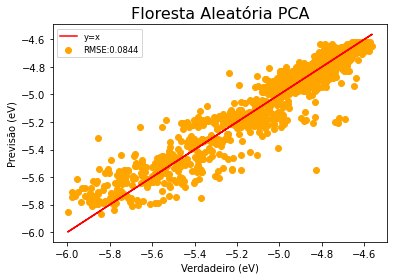

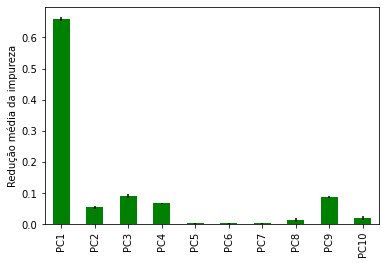

O RMSE do modelo floresta aleatória para Energia de Fermi foi de 0.08442563050181902 eV.


In [38]:
#Teste do modelo para energia de fermi;
floresta(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe,'Energia de Fermi' ,n_folhas_fe, n_profundidade_fe, n_arvores_fe )

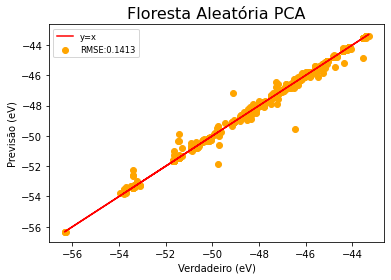

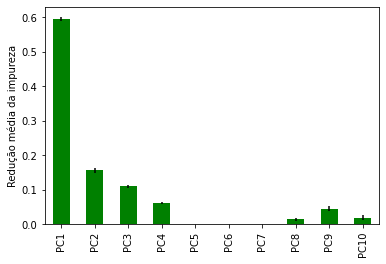

O RMSE do modelo floresta aleatória para Energia por Átomo foi de 0.14133424474532338 eV.


In [39]:
#Teste do modelo para energia por átomo:
floresta(x_treino_en, y_treino_en, x_teste_en, y_teste_en,'Energia por Átomo',n_folhas_en, n_profundidade_en, n_arvores_en)